# Sheetal Kalburgi
# Poonam Patil
# Nikhit Soares
# Shalin Shanghavi

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import dmatrices

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
churn =  pd.read_csv('Churn_Modelling.csv')

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Pre-processing

### checking for null values

In [4]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Dropping irrelevant columns
churn = churn.drop(['RowNumber','CustomerId','Surname'],axis='columns')

churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Analysis

### How does gender play a role in a customer's decision to stay or leave the bank?

Text(0.5, 0, 'Gender')

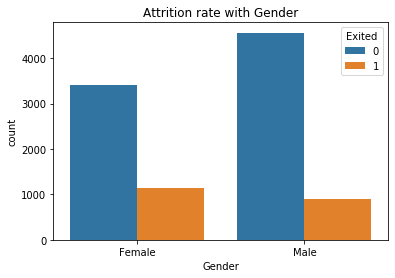

In [6]:
bar, ax = plt.subplots()
ax =sns.countplot(x='Gender',hue='Exited',data=churn)
ax.set_title('Attrition rate with Gender')
ax.set_xlabel('Gender')

In [7]:
exited_count = churn.groupby('Gender')
print(exited_count['Exited'].agg([np.sum, np.mean, np.std]))

         sum      mean       std
Gender                          
Female  1139  0.250715  0.433473
Male     898  0.164559  0.370816


### How does the attrition rate vary according to different countries?

Text(0.5, 0, 'Country')

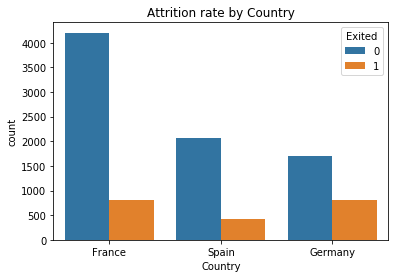

In [8]:
bar, ax1 = plt.subplots()
ax1 =sns.countplot(x='Geography',hue='Exited',data=churn)
ax1.set_title('Attrition rate by Country')
ax1.set_xlabel('Country')

In [9]:
exited_count = churn.groupby('Geography')
print(exited_count['Exited'].agg([np.sum, np.mean, np.std]))

           sum      mean       std
Geography                         
France     810  0.161548  0.368072
Germany    814  0.324432  0.468256
Spain      413  0.166734  0.372813


### How frequently do active members stay or leave the bank?

Text(0.5, 0, 'IsActiveMember')

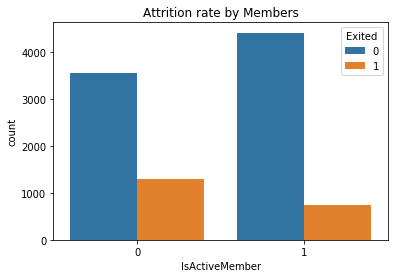

In [10]:
bar, ax2 = plt.subplots()
ax2 =sns.countplot(x='IsActiveMember',hue='Exited',data=churn)
ax2.set_title('Attrition rate by Members')
ax2.set_xlabel('IsActiveMember')

In [11]:
exited_count = churn.groupby('IsActiveMember')
print(exited_count['Exited'].agg([np.sum, np.mean, np.std]))

                 sum      mean       std
IsActiveMember                          
0               1302  0.268509  0.443230
1                735  0.142691  0.349791


### Of all the customers who have an account in the bank, why are most of the French customers closing their account?

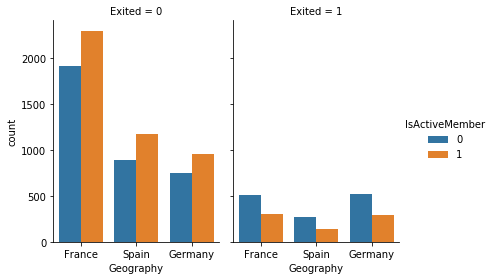

In [12]:
sns.catplot(x="Geography", hue="IsActiveMember", col="Exited", data=churn, kind="count",height=4, aspect=.7)
plt.show()

In [13]:
grouped = churn.groupby(["Geography","IsActiveMember"])["Exited"].count()
print(grouped)

Geography  IsActiveMember
France     0                 2423
           1                 2591
Germany    0                 1261
           1                 1248
Spain      0                 1165
           1                 1312
Name: Exited, dtype: int64


### Does the number of products play a role in customer retention?

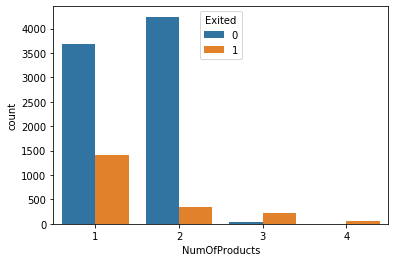

In [14]:
sns.countplot(x="NumOfProducts", hue="Exited", data=churn)
plt.show()

In [15]:
grouped = churn.groupby('NumOfProducts')
print(grouped['Exited'].agg([np.sum, np.mean, np.std]))

                sum      mean       std
NumOfProducts                          
1              1409  0.277144  0.447632
2               348  0.075817  0.264734
3               220  0.827068  0.378902
4                60  1.000000  0.000000


### How many customers leaving the bank have more than one product?

In [16]:
Products= churn.loc[churn['NumOfProducts'] >= 2][churn['Exited']==1]
Products.count().head()

D:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


CreditScore    628
Geography      628
Gender         628
Age            628
Tenure         628
dtype: int64

### Do people prefer to have different numbers of products at different geographic locations?

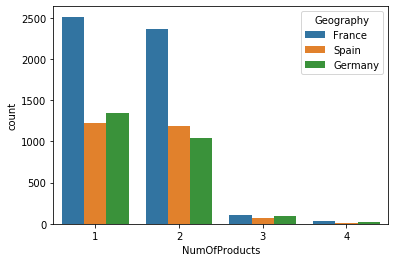

In [17]:
sns.countplot(x="NumOfProducts", hue="Geography", data=churn)
plt.show()

### Do people prefer to have different numbers of products at different geographic locations?(with respect to exited)

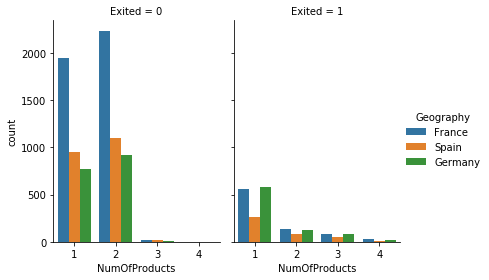

In [18]:
sns.catplot(x="NumOfProducts", hue="Geography", col="Exited", data=churn, kind="count",height=4, aspect=.7)
plt.show()

### Is the age of a customer a factor contributing to the customer leaving the bank?

In [19]:
age_b = pd.cut(churn.Age,bins = [10,20,30,40,50,60,70,80,90,100], labels = ["10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-100"])
churn.insert(7,'Age_B',age_b)

In [20]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Age_B,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,40-49,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,40-49,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,40-49,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,30-39,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,40-49,1,1,79084.10,0


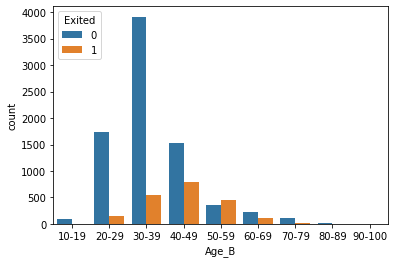

In [21]:
sns.countplot(x="Age_B", hue="Exited", data=churn)
plt.show()

### Do customers having higher tenure tend to be of a specific geographic location?

In [22]:
high_tenure = churn[['Tenure','Geography']][churn['Tenure']>6]
high_tenure.head()

,Tenure,Geography
2,8,France
5,8,Spain
6,7,France
12,10,France
14,7,Spain


In [23]:
High_Tenure=churn['Geography'][churn['Tenure']>6]
set(High_Tenure)
High_Tenure.value_counts()

France     1764
Germany     886
Spain       877
Name: Geography, dtype: int64

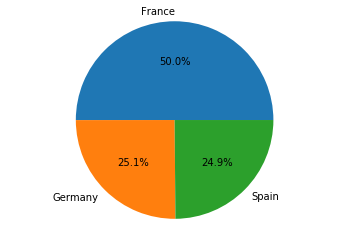

In [24]:
labels='France','Germany','Spain'
sizes=[1764,886,877]
pie_plot=plt.figure()
axes1=pie_plot.add_subplot(1,1,1)
axes1.pie(sizes,labels=labels,autopct='%1.1f%%')
axes1.axis('equal')
plt.show()

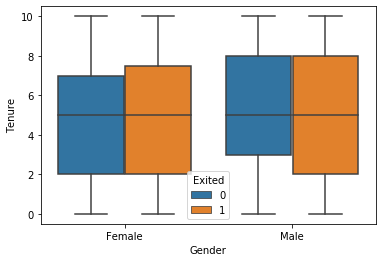

In [25]:
box, ax=plt.subplots()
ax=sns.boxplot(y='Tenure',x='Gender',data=churn,hue='Exited')

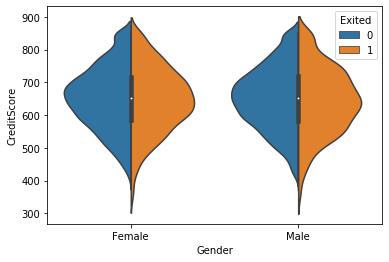

In [26]:
violin, ax3=plt.subplots()
ax3 = sns.violinplot(x='Gender', y='CreditScore',hue='Exited',data=churn,split=True)

In [27]:
high_credit=churn[['CreditScore','NumOfProducts','Gender','Geography']][churn['CreditScore']>650][churn['Gender']=='Female'][churn['NumOfProducts']>2][churn['Geography']=='Spain']
high_credit.head()

D:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CreditScore,NumOfProducts,Gender,Geography
297,687,3,Female,Spain
379,687,3,Female,Spain
1676,812,3,Female,Spain
2720,726,3,Female,Spain
3365,671,4,Female,Spain


In [28]:
ten_no=churn['Geography'][churn['Tenure']>6][churn['NumOfProducts']>=2]
ten_no.value_counts()

France     897
Spain      438
Germany    409
Name: Geography, dtype: int64

### How does the number of products relate to age, gender and credit score ?

In [29]:
#Scatter plot of Number of Products versus Age

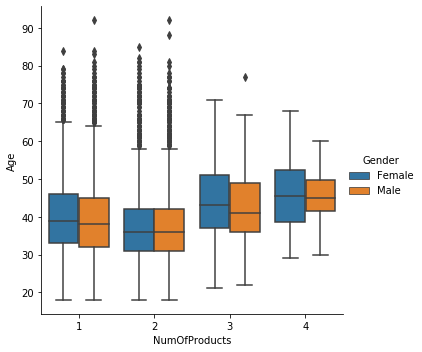

In [30]:
sns.catplot(x="NumOfProducts", y="Age",hue="Gender", kind="box", data=churn);

In [31]:
#Violin Plot of Number of products and age by gender

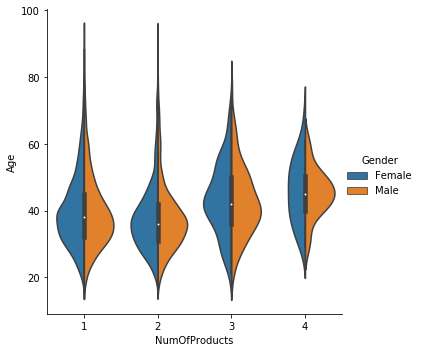

In [32]:
sns.catplot(x="NumOfProducts", y="Age", hue="Gender",
            kind="violin", split=True, data=churn);

(600, 724.3894736842105)

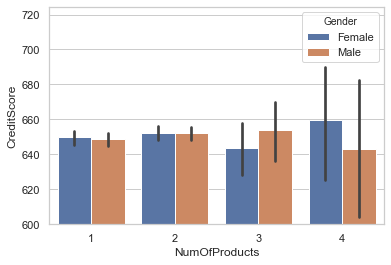

In [33]:
sns.set(style="whitegrid")
ax = sns.barplot(x="NumOfProducts", y="CreditScore",hue="Gender", data=churn)
plt.ylim(600,)

## Data Modelling

In [34]:
churned = pd.read_csv('Churn_Modelling.csv')

churned.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
# modifying regressor variable 'Exited' 
def exit(x):
    if x == 1:
        return 1
    else:
        return 0

churned['Exited'] = churned['Exited'].apply(exit)

#modifying predictor vaiable 'Geography' France = 0; Spain = 1; Germany=2
def geo(x):
    if x =='France':
        return 0
    elif x == 'Spain':
        return 1
    else:
        return 2

churned['Geography'] = churned['Geography'].apply(geo)

#modifying predicor variable 'Gender' Female = 1; Male = 0
def gender(x):
    if x =='Female':
        return 1
    else:
        return 0

churned['Gender'] = churned['Gender'].apply(gender)

churned.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


### Logistic Regression using statsmodel

In [36]:
model = smf.logit('Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary',
                   data = churned).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.429503
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 12 Dec 2019   Pseudo R-squ.:                  0.1503
Time:                        13:55:23   Log-Likelihood:                -4295.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0434      0.244    -16.562      0.000      -4.522      -3.565
CreditScore   

In [37]:
odds_ratio = np.exp(model.params)

odds_ratio

Intercept          0.017538
CreditScore        0.999321
Geography          1.436956
Gender             1.704082
Age                1.075249
Tenure             0.984695
Balance            1.000003
NumOfProducts      0.914451
HasCrCard          0.962211
IsActiveMember     0.340289
EstimatedSalary    1.000000
dtype: float64

### Comparing different Models

In [38]:
#funciton for ANOVA table
def anova_deviance_table(*models):
    return pd.DataFrame({
        'df_residuals': [i.df_resid for i in models],
        'resid_stddev': [i.deviance for i in models],
        'df': [i.df_model for i in models],
        'deviance': [i.deviance for i in models]
    })

In [39]:
#adding interaction term
churned['Geography*IsActiveMember'] = churned.Geography*churned.IsActiveMember
churned['Age*IsActiveMember'] = churned.Age*churned.IsActiveMember

churned.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography*IsActiveMember,Age*IsActiveMember
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1,0,42
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0,1,41
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0,1,43


In [40]:
# creating and fitting different logistic regression models using GLM
f1 = 'Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary'
f2 = 'Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember'
f3 = 'Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember + Geography*IsActiveMember'
f4 = 'Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember + Age*IsActiveMember'
f5 = 'Exited ~ Geography + Gender + Age + Tenure + IsActiveMember + Age*IsActiveMember'

logistic = statsmodels.genmod.families.family.Binomial(link=statsmodels.genmod.families.links.logit)

glm1 = smf.glm(f1, data=churned, family=logistic).fit()
glm2 = smf.glm(f2, data=churned, family=logistic).fit()
glm3 = smf.glm(f3, data=churned, family=logistic).fit()
glm4 = smf.glm(f4, data=churned, family=logistic).fit()
glm5 = smf.glm(f5, data=churned, family=logistic).fit()


print(anova_deviance_table(glm1,glm2,glm3,glm4,glm5))


D:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


   df_residuals  resid_stddev  df     deviance
0          9989   8590.050944  10  8590.050944
1          9993   8597.856065   6  8597.856065
2          9992   8597.056274   7  8597.056274
3          9992   8289.378078   7  8289.378078
4          9993   8339.525566   6  8339.525566


In [41]:
#AIC and BIC values
mod_names = ['glm1','glm2','glm3','glm4','glm5']

mods = [glm1,glm2,glm3,glm4,glm5]

mods_aic = list(map(statsmodels.regression.linear_model.RegressionResults.aic,mods))

mods_bic = list(map(statsmodels.regression.linear_model.RegressionResults.bic,mods))

abic = pd.DataFrame({
    'model': mod_names,
    'AIC':mods_aic,
    'BIC':mods_bic
})

abic

,model,AIC,BIC
0,glm1,8612.050944,8691.364688
1,glm2,8611.856065,8662.328448
2,glm3,8613.056274,8670.738997
3,glm4,8305.378078,8363.060801
4,glm5,8353.525566,8403.997949


### k-fold cross validation

In [42]:
#creating predictor and response matrices
y1,X1 = dmatrices('Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary',churned)
y2,X2 = dmatrices('Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember',churned)
y3,X3 = dmatrices('Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember + Geography*IsActiveMember',churned)
y4,X4 = dmatrices('Exited ~ CreditScore + Geography + Gender + Age + Balance + IsActiveMember + Age*IsActiveMember',churned)
y5,X5 = dmatrices('Exited ~ Geography + Gender + Age + Tenure + IsActiveMember + Age*IsActiveMember',churned)

#fitting the model
lr = linear_model.LogisticRegression()

s1 = cross_val_score(lr, X1, y1, cv=5)
s2 = cross_val_score(lr, X2, y2, cv=5)
s3 = cross_val_score(lr, X3, y3, cv=5)
s4 = cross_val_score(lr, X4, y4, cv=5)
s5 = cross_val_score(lr, X5, y5, cv=5)

scores_df = pd.DataFrame([s1,s2,s3,s4,s5])

scores_df.apply(np.mean,axis=1)

D:\Anacondaaa\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anacondaaa\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anacondaaa\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anacondaaa\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

0    0.789300
1    0.789000
2    0.789200
3    0.812699
4    0.833401
dtype: float64

### Regularization: improving performance

In [43]:
response, predictors = dmatrices('Exited ~ Geography + Gender + Age + Tenure + IsActiveMember + Age*IsActiveMember',
                                 data = churned)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(predictors,response,test_size=0.2,random_state=42)

lr = linear_model.LogisticRegression()

logmodel = lr.fit(X_train, y_train)

D:\Anacondaaa\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#accuracy of train data set
print(lr.score(X_train,y_train))

0.832875


In [46]:
#accuracy of test data set
print(lr.score(X_test,y_test))

0.8365


In [47]:
predictions= logmodel.predict(X_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
#classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91      1607
         1.0       0.73      0.27      0.39       393

    accuracy                           0.84      2000
   macro avg       0.79      0.62      0.65      2000
weighted avg       0.82      0.84      0.80      2000



In [49]:
#confusion matrix generation
print(confusion_matrix(y_test, predictions))

[[1568   39]
 [ 288  105]]
